In [ ]:
# Imports
import tensorflow as tf
import keras
import tensorflow_datasets as tfds

from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD


from sklearn.model_selection import train_test_split

In [ ]:
# Loading data and pre-processing
(train_images, train_labels), (test_images, test_labels) =  tfds.as_numpy(tfds.load('mnist',
                         split = ['train', 'test'],
                         batch_size=-1,
                         as_supervised=True))

# Step 1: Normalize pixel values to be in the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 2: Add a channel dimension to the images
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Step 3: Z-score Standardization
mean = train_images.mean()
std = train_images.std()
train_images = (train_images - mean) / std
test_images = (test_images - mean) / std

train_images = train_images.squeeze()
test_images = test_images.squeeze()

# Step 4: Convert labels to one-hot encopding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Epoch 1/20
469/469 [==============================] - 5s 5ms/step - loss: 0.2447 - accuracy: 0.9298 - val_loss: 0.0853 - val_accuracy: 0.9733
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0751 - accuracy: 0.9771 - val_loss: 0.0560 - val_accuracy: 0.9811
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0512 - val_accuracy: 0.9849
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.0443 - val_accuracy: 0.9852
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.0514 - val_accuracy: 0.9834
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0249 - accuracy: 0.9926 - val_loss: 0.0452 - val_accuracy: 0.9857
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0365 - val_accuracy: 0.9891
Epoch 

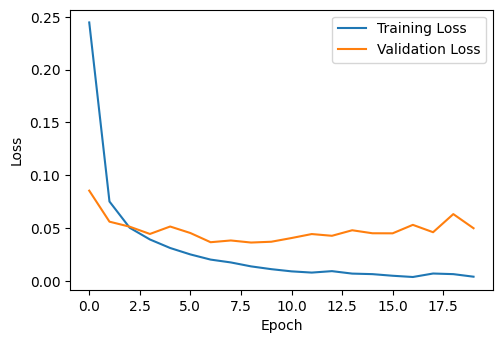

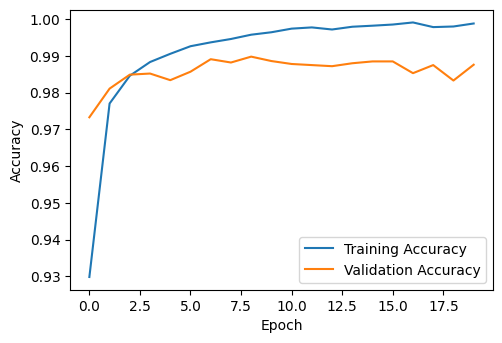

In [ ]:
# LeNet Model
model_LeNet = Sequential()
model_LeNet.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)))
model_LeNet.add(MaxPooling2D(pool_size=(2, 2)))
model_LeNet.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model_LeNet.add(MaxPooling2D(pool_size=(2, 2)))
model_LeNet.add(Flatten())
model_LeNet.add(Dense(120, activation='tanh'))
model_LeNet.add(Dense(84, activation='tanh'))
model_LeNet.add(Dense(10, activation='softmax'))

# Compile the LeNet Model
model_LeNet.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Train the LeNet Model
history_LeNet = model_LeNet.fit(train_images, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_images, test_labels))

# Print History
score = model_LeNet.evaluate(test_images, test_labels)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

# summarize history for loss
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(history_LeNet.history['loss'], label = 'Training Loss')
plt.plot(history_LeNet.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# summarize history for accuracy
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(history_LeNet.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_LeNet.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Epoch 1/20
938/938 [==============================] - 68s 52ms/step - loss: 0.1276 - accuracy: 0.9607 - val_loss: 0.0952 - val_accuracy: 0.9697
Epoch 2/20
938/938 [==============================] - 42s 45ms/step - loss: 0.0525 - accuracy: 0.9842 - val_loss: 0.0315 - val_accuracy: 0.9903
Epoch 3/20
938/938 [==============================] - 42s 44ms/step - loss: 0.0398 - accuracy: 0.9873 - val_loss: 0.1270 - val_accuracy: 0.9603
Epoch 4/20
938/938 [==============================] - 43s 45ms/step - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.1080 - val_accuracy: 0.9655
Epoch 5/20
938/938 [==============================] - 41s 43ms/step - loss: 0.0320 - accuracy: 0.9904 - val_loss: 0.0500 - val_accuracy: 0.9854
Epoch 6/20
938/938 [==============================] - 41s 44ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0480 - val_accuracy: 0.9843
Epoch 7/20
938/938 [==============================] - 42s 45ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0380 - val_accuracy:

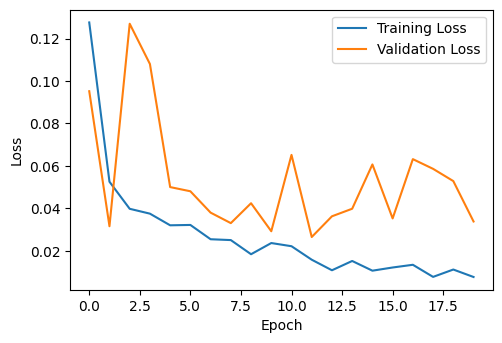

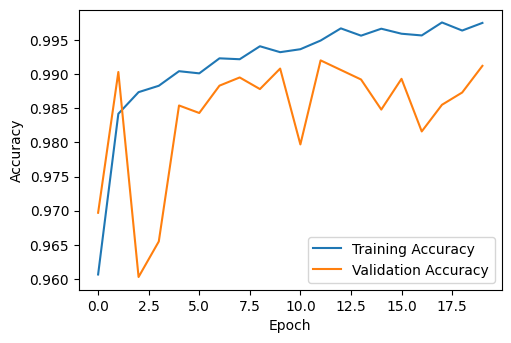

In [ ]:
# DenseNet model
# step 0: add padding, because densenet wants 32x32 sized images

# Loading data and pre-processing
(train_images, train_labels), (test_images, test_labels) =  tfds.as_numpy(tfds.load('mnist',
                         split = ['train', 'test'],
                         batch_size=-1,
                         as_supervised=True))

pad_width = ((0, 0), (2, 2), (2, 2), (0, 0))
train_images = np.pad(train_images, pad_width, mode='constant')
test_images = np.pad(test_images, pad_width, mode='constant')

# Step 1: Normalize pixel values to be in the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 2: Add a channel dimension to the images
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Step 3: Z-score Standardization
mean = train_images.mean()
std = train_images.std()
train_images = (train_images - mean) / std
test_images = (test_images - mean) / std

train_images = train_images.squeeze()
test_images = test_images.squeeze()

# Step 4: Convert labels to one-hot encopding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

model_densenet = DenseNet121(include_top=True, weights=None, input_shape=(32, 32, 1), classes=10)

# Compile the DenseNet model
model_densenet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 20

# Train the DenseNet model
history_densenet = model_densenet.fit(train_images, train_labels, batch_size=batch_size,
                                      epochs=epochs, validation_data=(test_images, test_labels))

# Print History
score = model_densenet.evaluate(test_images, test_labels)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

# summarize history for loss
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(history_densenet.history['loss'], label = 'Training Loss')
plt.plot(history_densenet.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# summarize history for accuracy
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(history_densenet.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_densenet.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# EfficentNet
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Split the training dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)


In [ ]:
# Normalize pixel values to be in the range [0, 1]
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]
val_images = val_images[..., tf.newaxis]
train_images, val_images, test_images = train_images / 255.0, val_images / 255.0, test_images / 255.0

In [ ]:
train_images = tf.image.convert_image_dtype(train_images, dtype=tf.uint8)
test_images = tf.image.convert_image_dtype(test_images, dtype=tf.uint8)
val_images = tf.image.convert_image_dtype(val_images, dtype=tf.uint8)

In [ ]:
train_images = tf.image.grayscale_to_rgb(train_images)
val_images = tf.image.grayscale_to_rgb(val_images)
test_images = tf.image.grayscale_to_rgb(test_images)

In [ ]:
# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Fit the ImageDataGenerator
train_datagen.fit(train_images)
train_datagen.fit(val_images)

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=layers.Input(shape=(28, 28, 3)))
base_model.trainable = True

#custom dense layers for classification
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(10, activation='softmax')(x)

#adding those layers
efficientNet_model = models.Model(inputs=base_model.input, outputs=output)

efficientNet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
history = efficientNet_model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
1500/1500 [==============================] - 113s 49ms/step - loss: 0.2444 - accuracy: 0.9295 - val_loss: 0.0769 - val_accuracy: 0.9807
Epoch 2/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1039 - accuracy: 0.9723 - val_loss: 0.0602 - val_accuracy: 0.9832
Epoch 3/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.0939 - accuracy: 0.9760 - val_loss: 0.0421 - val_accuracy: 0.9885
Epoch 4/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0697 - accuracy: 0.9819 - val_loss: 0.7147 - val_accuracy: 0.9463
Epoch 5/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0614 - accuracy: 0.9837 - val_loss: 0.0684 - val_accuracy: 0.9811
Epoch 6/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0578 - accuracy: 0.9847 - val_loss: 0.0418 - val_accuracy: 0.9897
Epoch 7/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.0415 - accuracy: 0.9889 - val_loss: 0.0415 

In [ ]:
efficientNet_model.summary()
efficientNet_model.evaluate

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 28, 28, 3)            0         ['input_2[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 28, 28, 3)            7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 28, 28, 3)            0         ['normalization[0][0]']   

<bound method Model.evaluate of <keras.src.engine.functional.Functional object at 0x7e9299299810>>

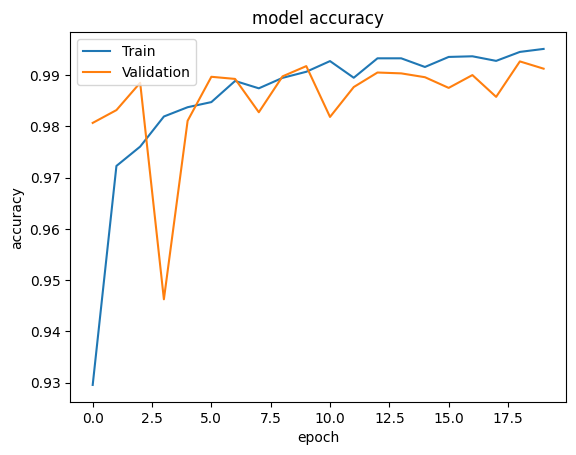

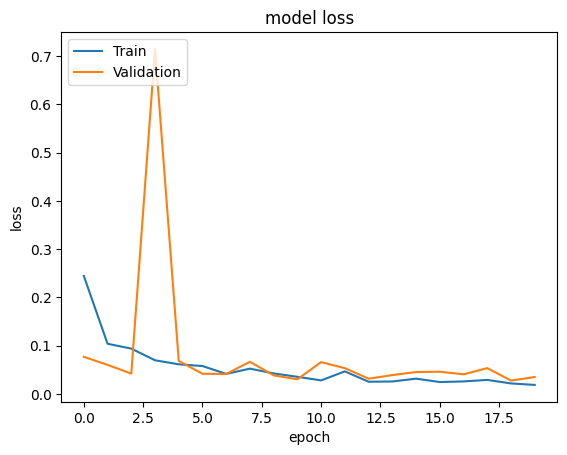

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = efficientNet_model.evaluate(test_images, test_labels)

# Print the test loss and accuracy
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy*100:.2f}%')